# Homework on Accept-Reject Sampling

Suppose $X$ is a random variable that follows a half-normal distribution $N^+(0,2)$. Write an accept-reject program that uses the exponential distribution $Exp(2)$ as the proposal distribution to draw samples from $X$. The challenge is to find the value of `m`. 


## Draw the density plots of $X$ and $Exp(2)$ to visually inspect the distributions. What is the range in the values of $X$ that `m` is most likely to occur?


## Write a program that calculates `m`. 
Hint: An _exact_ solution may be difficult and so an approximated value is enough. 


## Write an accept-reject sampling program for $X$ and use it to draw a random sample of 100,000 values.


## Draw a histogram of the sample and overlay it with the theoretical density. Calculate the mean and the variance of the sample and compare them to the theoretical values. Are they close?

The range of x that m is most likely to occure is roughly [0, 2.2]


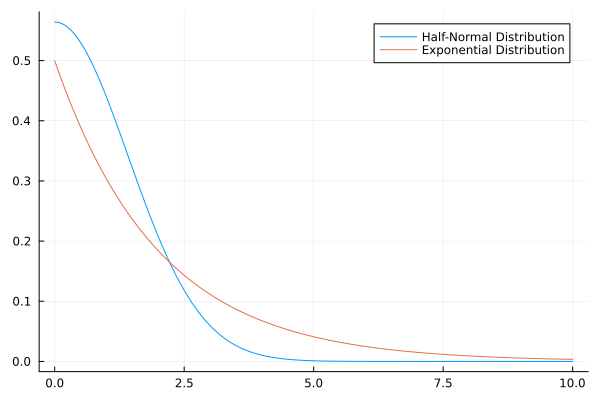

In [26]:
using Distributions, Plots 

# Define function: pdf of half normal distribution and exponential distribution
function plot_pdfs(sigma, lambda)

    half_normal_dist = Truncated(Normal(0, sigma), 0, Inf)
    exp_dist = Exponential(lambda)

    x = 0:0.01:10
    plot(x, pdf(half_normal_dist, x), label = "Half-Normal Distribution")
    plot!(x, pdf(exp_dist, x), label = "Exponential Distribution")

end

# Observe the graph
println("The range of x that m is most likely to occure is roughly [0, 2.2]")
plot_pdfs(sqrt(2), 2)

In [29]:
using Optim, Distributions

# Define function: find the ratio of two pdfs
function neg_pdf_ratio(x)

    # construct `sample_dist` and `proposal_dist`
    sample_dist = Truncated(Normal(0, sqrt(2)), 0, Inf)
    proposal_dist = Exponential(2)

    # compute their ratio, and return as negative value for finding optimal
    ratio = pdf(sample_dist, x) / pdf(proposal_dist, x)
    return -ratio

end

# Find maximizer and maximized value
result = optimize(neg_pdf_ratio, 0.0, 10.0, Brent())  # 直接指定搜索区间[0,10]，因为Truncated(Normal)在负值处没有定义
max_point = Optim.minimizer(result)
max_value = -Optim.minimum(result)

# Print out the maximized value
println("Maximum point of m is: ", max_point)
println("Maximum value of m is: ", max_value)


Maximum point of m is: 0.99999999946897
Maximum value of m is: 1.448867530211582


In [7]:
# Define function: given sampling distribution and proposal distribution, use m to do A-R sampling
function accept_reject_sampling(num_samples, m, lambda, sigma)

    # object setting
    samples = []
    count = 1
    sample_dist = Truncated(Normal(0, sigma), 0, Inf)
    proposal_dist = Exponential(lambda)

    # keep drawing sample and accept/reject until the demanded amount is satisfied
    while count <= num_samples

        y = rand(proposal_dist)
        u = rand(Uniform(0, m * pdf(proposal_dist, y)))
        if u <= pdf(sample_dist, y)
            push!(samples, y)
            count += 1
        end

    end

    # after sampling, return the samples
    return samples

end

accept_reject_sampling (generic function with 1 method)

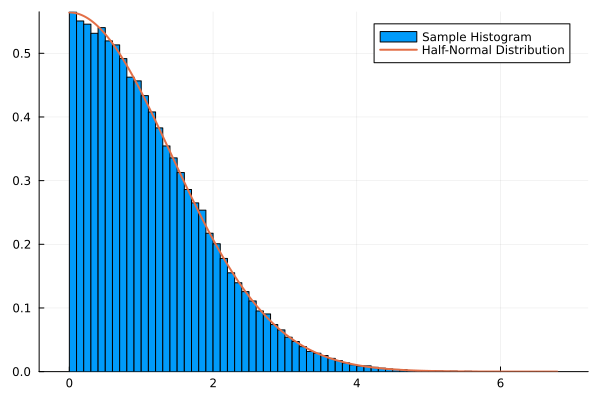

In [31]:
using Plots, Distributions, Statistics

# 假设calculate_m和accept_reject_sampling函数已经给出
# 这里直接使用samples变量作为样本数据

# object setting
num_samples = 100000
lambda = 2
sigma = sqrt(2)
m = max_value  # the value we find in the first cell

# accept/reject sampling
samples = accept_reject_sampling(num_samples, m, lambda, sigma)

# histogram of the samples
plot1 = histogram(samples, bins = 100, label = "Sample Histogram", normed = true)

# add the hypothetical line
x_vals = 0:0.01:maximum(samples)
half_normal_dist = Truncated(Normal(0, sigma), 0, Inf)
y_vals = pdf.(half_normal_dist, x_vals)
plot1 = plot!(x_vals, y_vals, label = "Half-Normal Distribution", linewidth = 2)

